In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
#import lightgbm as lgb
#import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold, RepeatedKFold
from scipy import sparse
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
from datetime import datetime

In [2]:
train_abbr=pd.read_excel("price1_5_train_abbr.xlsx",encoding='ISO-8859-1')
train=pd.read_excel("price1_5_train_complete.xlsx",encoding='ISO-8859-1')
test_abbr=pd.read_excel("price1_7_test_abbr.xlsx",encoding='ISO-8859-1')
test=pd.read_excel("price1_7_test_complete.xlsx",encoding='ISO-8859-1')
test_sub=pd.read_excel("pre17_result.xlsx",encoding='ISO-8859-1')

In [3]:
test.shape

(96, 12)

In [4]:
test_sub.shape

(0, 0)

In [5]:
train.shape

(3456, 12)

In [6]:
train.head()

,date,time,price1,MW1,MW2,MW3,MW4,MW5,MW6,MW7,pub1,pub2
0,2021-12-01,00:15:00,349.88,58315.6,10231.0,7953.15,0.0,4645,7525,2477.0,35486.45,25484.45
1,2021-12-01,00:30:00,351.36,58164.9,10231.0,7897.84,0.0,4645,7525,2477.0,35391.06,25389.06
2,2021-12-01,00:45:00,351.28,57976.4,10231.0,7851.61,0.0,4645,7525,2477.0,35248.79,25246.79
3,2021-12-01,01:00:00,350.66,57750.4,10231.0,7811.62,0.0,4645,7525,2477.0,35062.78,25060.78
4,2021-12-01,01:15:00,349.86,57448.9,10231.0,7773.40,0.0,4645,7525,2477.0,34799.50,24797.50


In [7]:
train.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3456 entries, 0 to 3455
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3456 non-null   datetime64[ns]
 1   time    3456 non-null   object        
 2   price1  3456 non-null   float64       
 3   MW1     3456 non-null   float64       
 4   MW2     3456 non-null   float64       
 5   MW3     3456 non-null   float64       
 6   MW4     3456 non-null   float64       
 7   MW5     3456 non-null   int64         
 8   MW6     3456 non-null   int64         
 9   MW7     3456 non-null   float64       
 10  pub1    3456 non-null   float64       
 11  pub2    3456 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 324.1+ KB


In [8]:
y_train_=train["price1"]

In [9]:
y_train_.value_counts()

-80.00      222
 440.00      13
 442.00      12
 402.00      12
 450.00      11
 472.00      11
 375.00      10
 448.00      10
 412.00      10
 406.00      10
 418.00      10
 390.00       9
 400.00       9
 275.00       8
 438.00       8
 474.00       8
 370.00       8
 486.00       8
 520.00       8
 414.00       8
 200.00       8
 446.00       8
 338.00       7
 428.00       7
 386.00       7
 151.00       7
 506.00       7
 368.00       7
 500.00       7
 353.00       7
 364.00       7
 277.00       7
 394.00       7
 360.00       7
 460.00       7
 362.00       7
 171.00       6
 456.00       6
 444.00       6
 408.00       6
 267.00       6
 398.00       6
 430.00       6
 198.00       6
 356.00       6
 164.00       6
 175.00       6
 372.00       6
 404.00       6
 273.00       6
 321.00       6
 169.00       6
 191.00       6
 242.00       5
 174.00       5
 182.00       5
 183.00       5
 186.00       5
 458.00       5
 149.00       5
 371.00       5
 462.00       5
 380.00 

In [10]:
y_train_=y_train_.map(lambda x:3 if x==-8 else x)

In [11]:
data=pd.concat([train,test],axis=0,ignore_index=True)

In [12]:
data.shape

(3552, 12)

In [13]:
print(data)

           date      time   price1      MW1      MW2       MW3      MW4   MW5  \
0    2021-12-01  00:15:00   349.88  58315.6  10231.0   7953.15     0.00  4645   
1    2021-12-01  00:30:00   351.36  58164.9  10231.0   7897.84     0.00  4645   
2    2021-12-01  00:45:00   351.28  57976.4  10231.0   7851.61     0.00  4645   
3    2021-12-01  01:00:00   350.66  57750.4  10231.0   7811.62     0.00  4645   
4    2021-12-01  01:15:00   349.86  57448.9  10231.0   7773.40     0.00  4645   
5    2021-12-01  01:30:00   349.27  57185.1  10231.0   7740.10     0.00  4645   
6    2021-12-01  01:45:00   348.38  56959.1  10231.0   7705.99     0.00  4645   
7    2021-12-01  02:00:00   348.22  56770.7  10231.0   7682.14     0.00  4645   
8    2021-12-01  02:15:00   348.00  56657.6  10231.0   7678.56     0.00  4645   
9    2021-12-01  02:30:00   347.69  56431.5  10231.0   7676.16     0.00  4645   
10   2021-12-01  02:45:00   346.32  56167.8  10231.0   7675.34     0.00  4645   
11   2021-12-01  03:00:00   

In [14]:
data=data.drop(["date"], axis=1)
data=data.drop(["time"], axis=1)
#data=data.drop(["price1"], axis=1)

In [15]:
#data=data.drop(["id"], axis=1)
print(data)

       price1      MW1      MW2       MW3      MW4   MW5   MW6      MW7  \
0      349.88  58315.6  10231.0   7953.15     0.00  4645  7525  2477.00   
1      351.36  58164.9  10231.0   7897.84     0.00  4645  7525  2477.00   
2      351.28  57976.4  10231.0   7851.61     0.00  4645  7525  2477.00   
3      350.66  57750.4  10231.0   7811.62     0.00  4645  7525  2477.00   
4      349.86  57448.9  10231.0   7773.40     0.00  4645  7525  2477.00   
5      349.27  57185.1  10231.0   7740.10     0.00  4645  7525  2477.00   
6      348.38  56959.1  10231.0   7705.99     0.00  4645  7525  2477.00   
7      348.22  56770.7  10231.0   7682.14     0.00  4645  7525  2477.00   
8      348.00  56657.6  10231.0   7678.56     0.00  4645  7525  2477.00   
9      347.69  56431.5  10231.0   7676.16     0.00  4645  7525  2477.00   
10     346.32  56167.8  10231.0   7675.34     0.00  4645  7525  2477.00   
11     346.02  56017.0  10231.0   7673.33     0.00  4645  7525  2477.00   
12     344.96  55715.6  1

In [16]:
data["price1"]=data["price1"].map(lambda x:x-1)

In [17]:
X_train_ = data[:train.shape[0]]
X_test_  = data[train.shape[0]:]

In [18]:
target_column = 'price1'
feature_columns=list(X_test_.columns) 
feature_columns

['price1', 'MW1', 'MW2', 'MW3', 'MW4', 'MW5', 'MW6', 'MW7', 'pub1', 'pub2']

In [19]:
X_train = np.array(X_train_)
y_train = np.array(y_train_)
X_test  = np.array(X_test_)

In [20]:
X_train.shape

(3456, 10)

In [21]:
y_train.shape

(3456,)

In [22]:
X_test.shape

(96, 10)

In [23]:
#自定义评价函数
def myFeval(preds, xgbtrain):
    label = xgbtrain.get_label()
    score = mean_squared_error(label,preds)
    return 'myFeval',score

In [24]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

In [25]:
str_ = "loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0"

In [26]:
len(str_.split(","))

21

In [27]:
reg = GBR(n_estimators = 100)

In [28]:
reg = reg.fit(X_train,y_train)

In [29]:
reg.score(X_train,y_train) #在训练好的数据上的R2

0.9999315763282495

In [31]:
from time import time
for i in range(50,550,50): #[50,100,150,....500]
    start = time() #开始时间的记录
    model = GBR(n_estimators=i,random_state=1412)
    model.fit(X_train,y_train)
    print("estimators:{},\tR2:{:.3f}%,\tTime:{:.3f}".format(i,model.score(X_train,y_train)*100,time()-start))

estimators:50,	R2:99.987%,	Time:0.306
estimators:100,	R2:99.993%,	Time:0.623
estimators:150,	R2:99.994%,	Time:0.913
estimators:200,	R2:99.995%,	Time:1.179
estimators:250,	R2:99.996%,	Time:1.517
estimators:300,	R2:99.997%,	Time:1.739
estimators:350,	R2:99.997%,	Time:2.053
estimators:400,	R2:99.997%,	Time:2.316
estimators:450,	R2:99.998%,	Time:2.622
estimators:500,	R2:99.998%,	Time:2.970


In [35]:
from sklearn.metrics import r2_score, auc
pred = model.predict(X_test)
acc=test['price1']
print( r2_score(acc, pred) )

0.9998126693904894


In [37]:
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
print ('均方差',mean_squared_error(acc,pred))
print ('绝对差',mean_absolute_error(acc,pred))
print ('解释度',explained_variance_score(acc,pred))

均方差 5.002669854234793
绝对差 1.449068739173392
解释度 0.9998128930509791


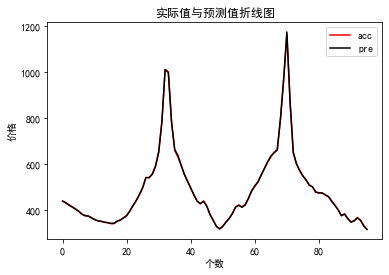

In [39]:
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
#acc 实际值数据
#y_pred 预测值数据
plt.plot(acc,color="r",label="acc") #颜色表示
plt.plot(pred,color=(0,0,0),label="pre") 
plt.xlabel("个数") 
plt.ylabel("价格") 
plt.title("实际值与预测值折线图") 
plt.legend()
plt.show()